# Data set from Kaggle 
https://www.kaggle.com/lava18/google-play-store-apps/downloads/google-play-store-apps.zip/6

# Context
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.
Content
Each app (row) has values for catergory, rating, size, and more.

In [37]:
import math
import pdb
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import t, sem
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [38]:
# Hide deprecated warnings
import warnings
warnings.filterwarnings('ignore')

In [39]:
# Load data from the folder where I uploaded the csv file: 
data = pd.read_csv('/Users/AirMorena/Desktop/final_proj/csv/google_play_store/data_engineer1.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9351 entries, 0 to 9350
Data columns (total 25 columns):
App                         9351 non-null object
Category                    9351 non-null object
Rating                      9351 non-null float64
Reviews                     9351 non-null int64
Size                        9351 non-null float64
Installs                    9351 non-null int64
Type                        9351 non-null object
Price                       9351 non-null float64
Content Rating              9351 non-null object
Genres                      9351 non-null object
Last Updated                9351 non-null object
Current Ver                 9351 non-null object
Android Ver                 9351 non-null float64
day                         9351 non-null int64
month                       9351 non-null int64
year                        9351 non-null int64
month_year                  9351 non-null object
Current Ver_clean           9351 non-null float64
App_dup    

In [5]:
data.shape

(9351, 25)

In [6]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,year,month_year,Current Ver_clean,App_dup,Installs_group,reviews_levels,Size_group,Successful_App,Current Ver_clean_levels,Android Ver_levels
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,...,2018,2018-01,1.000000,0,low,low,small,0,low,high
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,2018,2018-01,2.000000,1,high,low,small,0,medium,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,...,2018,2018-08,1.200000,0,high,high,small,1,low,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,...,2018,2018-06,9.660961,0,high,high,big,1,high,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,...,2018,2018-06,1.100000,0,low,low,small,0,low,high


In [41]:
data['Installs_group'].unique()

array(['low', 'high'], dtype=object)

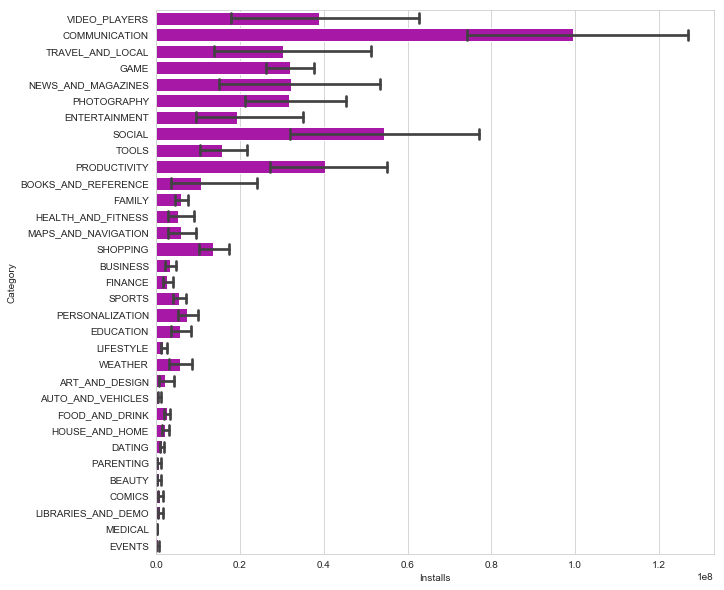

In [42]:
#### What are the categories with highest average number of installs?
#barplot Installations and category
plt.figure(figsize=(10,10))
g = sns.barplot(x="Installs", y="Category", data=data.sort_values(by="Installs", ascending=False).reset_index(), capsize=.6, color='m')
#plt.title('average number of Installations in each Category',size = 20)
# the categories with the highest number of installs are:comm, social, productivity

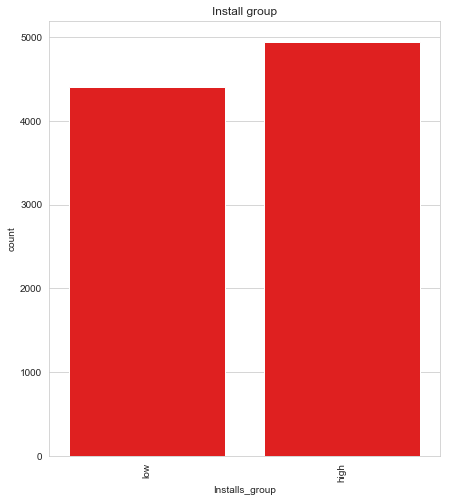

In [43]:
# number of apps by type of install group
sns.set_style('whitegrid')
plt.figure(figsize=(7,8))
plt.title('Install group')
sns.countplot(x='Installs_group',data = data, color='r')
plt.xticks(rotation=90)
plt.show()

In [44]:
data['reviews_levels'].unique()

array(['low', 'high', 'medium'], dtype=object)

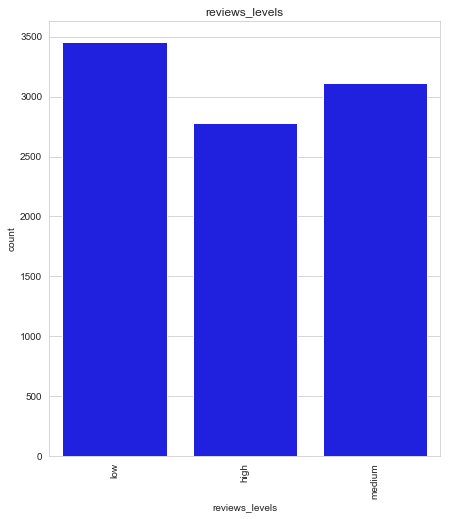

In [45]:
# number of apps by type of reviews groups
sns.set_style('whitegrid')
plt.figure(figsize=(7,8))
plt.title('reviews_levels')
sns.countplot(x='reviews_levels', data = data, color='b')
plt.xticks(rotation=90)
plt.show()

In [46]:
data['Size_group'].unique()

array(['small', 'big'], dtype=object)

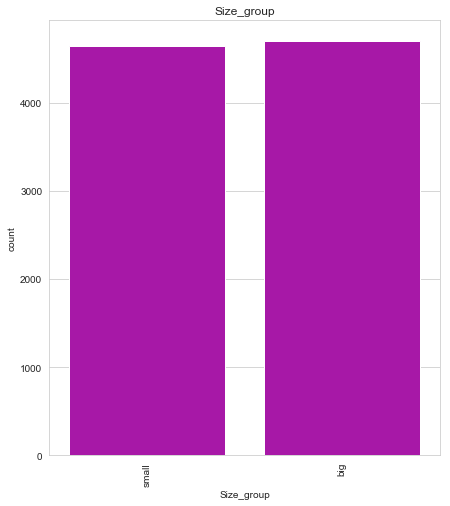

In [47]:
# number of apps by type of Size_group groups
sns.set_style('whitegrid')
plt.figure(figsize=(7,8))
plt.title('Size_group')
sns.countplot(x='Size_group', data = data, color='m')
plt.xticks(rotation=90)
plt.show()

In [14]:
data['Current Ver_clean_levels'].unique()

array(['low', 'medium', 'high'], dtype=object)

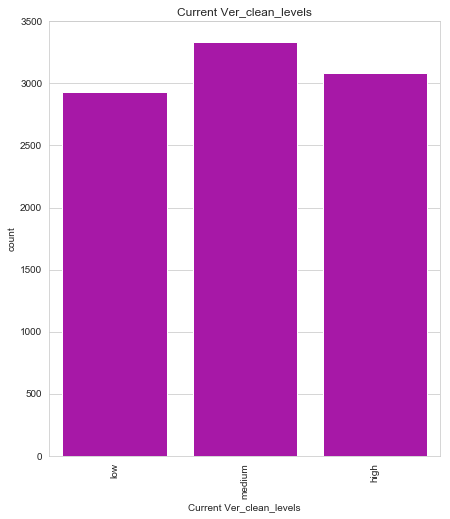

In [15]:
# number of apps by type of 'Current Ver_clean_levels' groups
sns.set_style('whitegrid')
plt.figure(figsize=(7,8))
plt.title('Current Ver_clean_levels')
sns.countplot(x='Current Ver_clean_levels', data = data, color='m')
plt.xticks(rotation=90)
plt.show()

In [16]:
data['Android Ver_levels'].unique()

array(['high', 'low'], dtype=object)

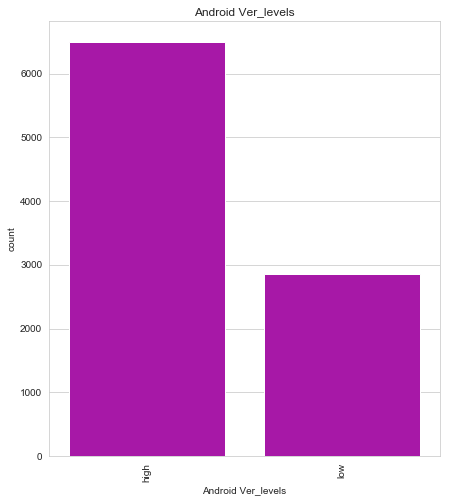

In [17]:
# number of apps by type of 'Android Ver_levels' groups
sns.set_style('whitegrid')
plt.figure(figsize=(7,8))
plt.title('Android Ver_levels')
sns.countplot(x='Android Ver_levels', data = data, color='m')
plt.xticks(rotation=90)
plt.show()

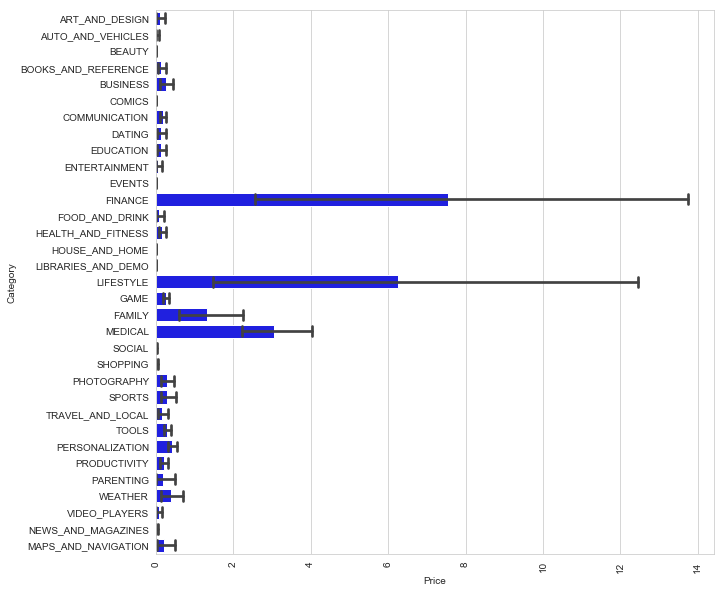

In [18]:
# what the catgories of App with the highest price
# barplot price and category
plt.figure(figsize=(10,10))
g = sns.barplot(x="Price", y="Category", data=data,capsize=.6, color='b')
# rotate tick labels to vertical

# Rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()

In [19]:
table1= pd.crosstab(data['Type'], data['Successful_App'],normalize='index')
print(table1)

Successful_App         0         1
Type                              
Free            0.691477  0.308523
Paid            0.961240  0.038760


In [48]:
table2= pd.crosstab(data['Category'], data['reviews_levels'],normalize='index').round(2)
print(table2)

reviews_levels       high   low  medium
Category                               
ART_AND_DESIGN       0.11  0.57    0.31
AUTO_AND_VEHICLES    0.08  0.53    0.38
BEAUTY               0.02  0.55    0.43
BOOKS_AND_REFERENCE  0.25  0.47    0.28
BUSINESS             0.15  0.55    0.30
COMICS               0.12  0.40    0.48
COMMUNICATION        0.48  0.28    0.23
DATING               0.15  0.42    0.43
EDUCATION            0.42  0.13    0.45
ENTERTAINMENT        0.52  0.03    0.46
EVENTS               0.00  0.64    0.36
FAMILY               0.22  0.44    0.34
FINANCE              0.17  0.49    0.34
FOOD_AND_DRINK       0.28  0.24    0.48
GAME                 0.54  0.17    0.30
HEALTH_AND_FITNESS   0.33  0.26    0.41
HOUSE_AND_HOME       0.21  0.17    0.62
LIBRARIES_AND_DEMO   0.11  0.61    0.28
LIFESTYLE            0.10  0.55    0.35
MAPS_AND_NAVIGATION  0.25  0.41    0.34
MEDICAL              0.04  0.74    0.22
NEWS_AND_MAGAZINES   0.27  0.39    0.33
PARENTING            0.06  0.52    0.42


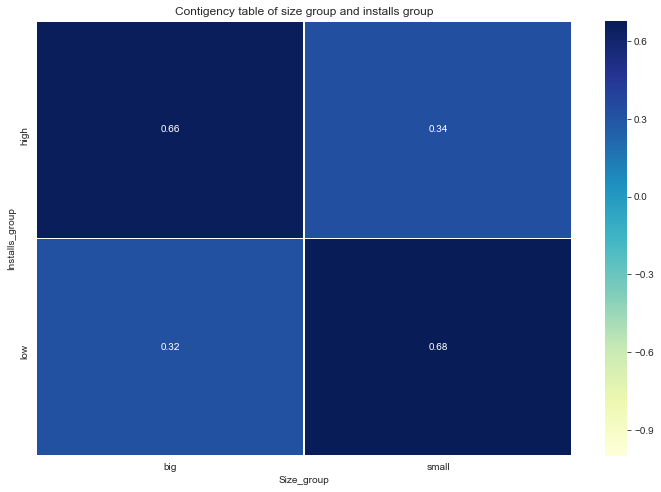

In [36]:
#heatmap
_=plt.figure(figsize=(12,8))
_ =sns.heatmap(pd.crosstab(data['Installs_group'], data['Size_group'], normalize='index'),annot=True, vmin=-1, cmap="YlGnBu",linewidths=.5) 
_=plt.title('Contigency table of size group and installs group')


In [40]:

oddsratio, pvalue = stats.fisher_exact(data['Size_group'], data['Installs_group'])

ValueError: invalid literal for int() with base 10: 'small'

In [22]:
# contingency table

In [23]:
chi, pvalue, dof, expctd = chi2_contingency(pd.crosstab(data['Category'], data['Size_group']))
print("Chi-square between {} and {} is {} with a p-value of {:2f}".format('Category','Size_group', chi, pvalue))
# highly significant

Chi-square between Category and Size_group is 892.4955186967443 with a p-value of 0.000000


import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=table2,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

In [24]:
chi, pvalue, dof, expctd = chi2_contingency(pd.crosstab(data['Category'], data['Successful_App']))
print("Chi-square between {} and {} is {} with a p-value of {:2f}".format('Category','Successful_App', chi, pvalue))

Chi-square between Category and Successful_App is 746.8930955401506 with a p-value of 0.000000


In [25]:
#table3= pd.crosstab(data['Genres'], data['Successful_App'],normalize='index').round(2)
#print(table3)

In [26]:
#chi, pvalue, dof, expctd = chi2_contingency(pd.crosstab(data['Genres'], data['Successful_App']))
#print("Chi-square between {} and {} is {} with a p-value of {:2f}".format('Genres','Successful_App', chi, pvalue))

In [27]:
table4= pd.crosstab(data['reviews_levels'], data['Successful_App'],normalize='index')
print(table4)

Successful_App         0         1
reviews_levels                    
high            0.285406  0.714594
low             0.998264  0.001736
medium          0.769602  0.230398


In [28]:
chi, pvalue, dof, expctd = chi2_contingency(pd.crosstab(data['reviews_levels'], data['Successful_App']))
print("Chi-square between {} and {} is {} with a p-value of {:2f}".format('reviews_levels','Successful_App', chi, pvalue))

Chi-square between reviews_levels and Successful_App is 3885.359598322383 with a p-value of 0.000000


In [29]:
table5= pd.crosstab(data['Size_group'], data['Successful_App'],normalize='index')
print(table5)

Successful_App         0         1
Size_group                        
big             0.582058  0.417942
small           0.839682  0.160318


In [35]:
import scipy.stats as stats
oddsratio, pvalue = stats.fisher_exact(data['Size_group'], data['Successful_App'])

ValueError: invalid literal for int() with base 10: 'small'

In [30]:
chi, pvalue, dof, expctd = chi2_contingency(pd.crosstab(data['Size_group'], data['Successful_App']))
print("Chi-square between {} and {} is {} with a p-value of {:2f}".format('nb_reviews_levels','Successful_App', chi, pvalue))

Chi-square between nb_reviews_levels and Successful_App is 752.4031586445853 with a p-value of 0.000000


In [31]:
table6= pd.crosstab(data['Size_group'], data['Installs_group'],normalize='index')
print(table6)

Installs_group      high       low
Size_group                        
big             0.698129  0.301871
small           0.357435  0.642565


In [32]:
chi, pvalue, dof, expctd = chi2_contingency(pd.crosstab(data['Size_group'], data['Installs_group']))
print("Chi-square between {} and {} is {} with a p-value of {:2f}".format('Size_group','Installs_group', chi, pvalue))

Chi-square between Size_group and Installs_group is 1087.6061041658377 with a p-value of 0.000000


In [33]:
# Fisher test, OR??

In [34]:
# Export data to my chosen folder (grouped var)
#data.to_csv("/Users/AirMorena/Desktop/final_proj/csv/140619_google_playstore_apps_clean_newgrouped_newtarget.csv", index=False, encoding='utf-8')